In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from b2.gsas import GSASModel
from gsasReconstruct import GSASModelReconstruct
print("hello world")
# read the gpx file as a gsas model
AlNi_model = GSASModelReconstruct("Al-Ni-dual-phase.gpx")

Drat, patching for Big Sur
GSAS-II binary directory: /Users/baishipu/opt/anaconda3/envs/ThesisEnv/GSASII/bindist


hello world
{"AlNi_model": "GSASModelReconstruct", "GSASModel": "type", "GSASModelReconstruct": "type", "pd": "module", "plt": "module"}
{"AlNi_model": "GSASModelReconstruct", "GSASModel": "type", "GSASModelReconstruct": "type", "pd": "module", "plt": "module"}
{"AlNi_model": "GSASModelReconstruct", "GSASModel": "type", "GSASModelReconstruct": "type", "pd": "module", "plt": "module"}
{"AlNi_model": "GSASModelReconstruct", "GSASModel": "type", "GSASModelReconstruct": "type", "pd": "module", "plt": "module"}
{"AlNi_model": "GSASModelReconstruct", "GSASModel": "type", "GSASModelReconstruct": "type", "pd": "module", "plt": "module"}
{"AlNi_model": "GSASModelReconstruct", "GSASModel": "type", "GSASModelReconstruct": "type", "pd": "module", "plt": "module"}
{"AlNi_model": "GSASModelReconstruct", "GSASModel": "type", "GSASModelReconstruct": "type", "pd": "module", "plt": "module"}
{"AlNi_model": "GSASModelReconstruct", "GSASModel": "type", "GSASModelReconstruct": "type", "pd": "module", "plt"

### Check the 3 variables that we care: microstrain, grain size, and phase fraction (which can be convert to weight%)

In [1]:
print("hello world")

hello world


In [2]:
# For AlNi phase
# read key '0:0:Mustrain;i' from the dictionary
AlNi_model.params['0:0:Mustrain;i']                     # 2000

# read key '0:0:Size;i' from the dictionary
AlNi_model.params['0:0:Size;i']                         # 0.5 micron

# read key '0:0:Scale' from the dictionary
AlNi_model.params['0:0:Scale']                          # 1.0

NameError: name 'AlNi_model' is not defined

In [3]:
P = AlNi_model.params

In [24]:
# For AlNi3 phase
# read key '0:0:Mustrain;i' from the dictionary
aaa = AlNi_model.params['1:0:Mustrain;i']                   # 5000

# read key '0:0:Size;i' from the dictionary
AlNi_model.params['1:0:Size;i']                         # 0.7 micron

# read key '1:0:Scale' from the dictionaryqq
AlNi_model.params['1:0:Scale']                          # 0.4219

0.6

### Try run a default model

Text(0.5, 1.0, 'Default AlNi Model')

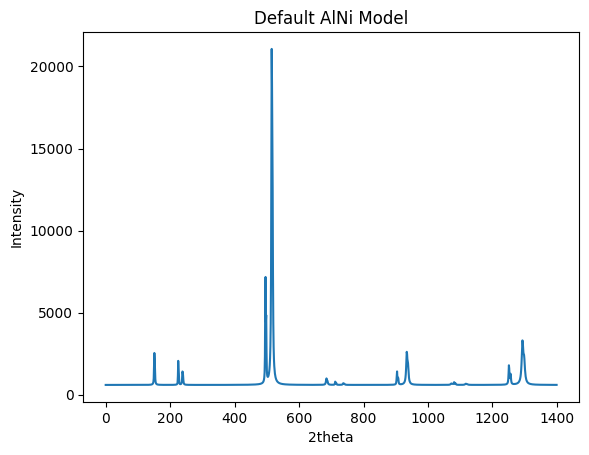

In [5]:
# leave out the phase_params only work bc there is actually AlNi and AlNi3 in the model
xrd_simul = AlNi_model.forward()
plt.plot(xrd_simul)
plt.xlabel('2theta')
plt.ylabel('Intensity')
plt.title('Default AlNi Model')

##### <span style="color:red"> Note: Need a seperate function for "frac" calculation, to enbed atomic weight to get to the correct weight fraction </span>

Refer to "Step 3: Set Phase Fractions" in https://subversion.xray.aps.anl.gov/pyGSAS/Tutorials/Simulation/SimTutorial.htm

## Change the crystal properties

Text(0.5, 1.0, 'AlNi Model')

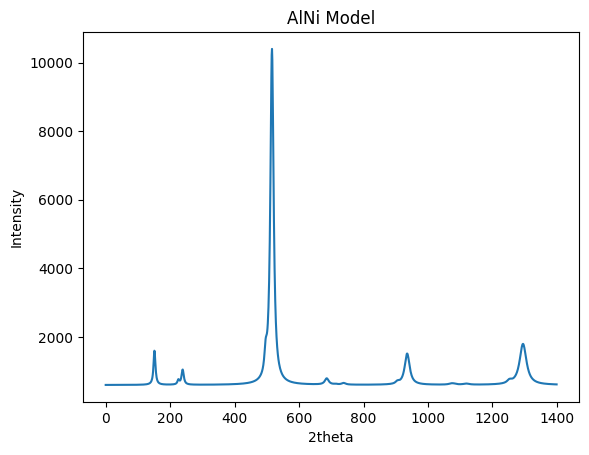

In [6]:
phase_params = {"AlNi": {"frac": 0.3, "mustrain": 12500, "grainsize": 0.08}, 
                "AlNi3": {"frac": 0.6, "mustrain": 22500, "grainsize": 0.8}}
xrd_simul = AlNi_model.forward(phase_params)

plt.plot(xrd_simul)
plt.xlabel('2theta')
plt.ylabel('Intensity')
plt.title('AlNi Model')

### Confirm values do change

In [17]:
# print multiple values
print("AlNi: ", AlNi_model.params['0:0:Scale'], 
        AlNi_model.params['0:0:Mustrain;i'], 
        AlNi_model.params['0:0:Size;i'])

In [8]:
list = [AlNi_model.params['0:0:Scale'], AlNi_model.params['0:0:Mustrain;i'], AlNi_model.params['0:0:Size;i']]
print(list)

In [9]:
AlNi_model.params['0:0:Mustrain;i']

12500

In [10]:
AlNi_model.params['0:0:Size;i']

0.08

In [11]:
AlNi_model.params['1:0:Scale']

0.6

In [12]:
AlNi_model.params['1:0:Mustrain;i']

22500

In [13]:
AlNi_model.params['1:0:Size;i']

0.8

### Checking on the TaTi BCC/B2 model

Text(0.5, 1.0, 'TaTi Model')

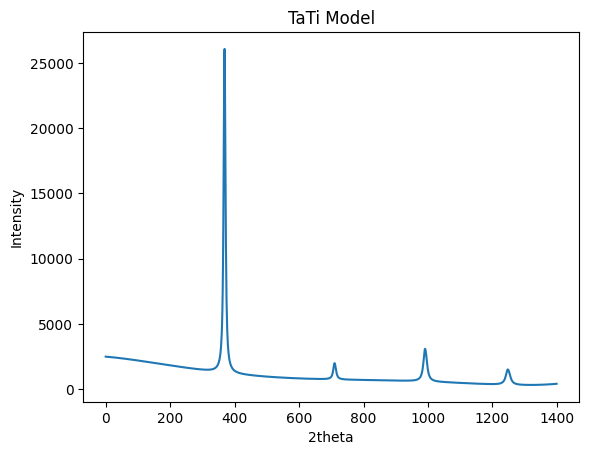

In [14]:
TaTi_model = GSASModelReconstruct("TaTi-B2-new.gpx")
phase_params = {"B2": {"mustrain": 12500, 
                       "grainsize": 0.8}}
xrd_simul = TaTi_model.forward(phase_params)

plt.plot(xrd_simul)
plt.xlabel('2theta')
plt.ylabel('Intensity')
plt.title('TaTi Model')

Text(0.5, 1.0, 'TaTi Model')

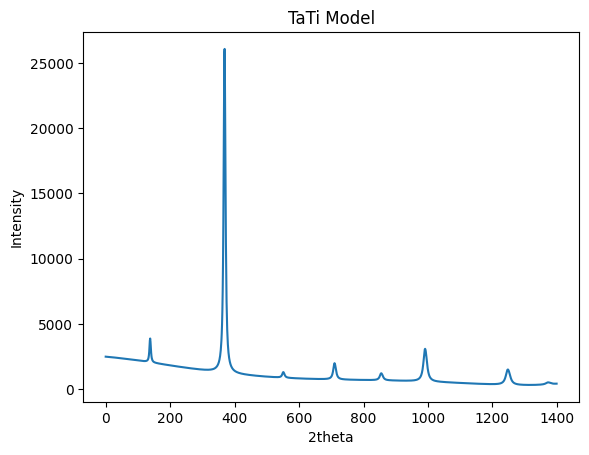

In [15]:
S = 0.6
RA = 0.5*S + 0.5
occupancies = [1-RA, 1-RA, RA, RA]
phase_params = {"B2": {"site_occupancies": occupancies, 
                       "mustrain": 12500, 
                       "grainsize": 0.8}}
xrd_simul = TaTi_model.forward(phase_params)

plt.plot(xrd_simul)
plt.xlabel('2theta')
plt.ylabel('Intensity')
plt.title('TaTi Model')

In [16]:
TaTi_model.derivative(["0:0:Mustrain;i"])

(array([[-5.9335715 , -5.95568277, -5.97774978, ..., -1.78436412,
         -2.2475249 , -2.65068786],
        [ 1.91463524,  1.92873281,  1.94302787, ..., 15.47885547,
         14.74087434, 14.04760462],
        [ 0.09736515,  0.09813844,  0.09892347, ...,  0.34811027,
          0.33176642,  0.31641019],
        ...,
        [ 1.        ,  0.97720817,  0.95457929, ...,  0.95457929,
          0.97720817,  1.        ],
        [-1.        , -0.96446415, -0.9293346 , ...,  0.9293346 ,
          0.96446415,  1.        ],
        [ 0.03060183,  0.03083112,  0.03106369, ...,  0.26154459,
          0.24499088,  0.23012038]]),
 {'0:0:Mustrain;i': array([0.00015317, 0.0001543 , 0.00015544, ..., 0.00123831, 0.00117927,
         0.00112381])})

Create .gpx from .cif using GSASIIScriptable
https://gsas-ii.readthedocs.io/en/latest/GSASIIscriptable.html#pattern-simulation